In [48]:
#import required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [49]:
#load the student performance dataset

df = pd.read_csv(r'C:\Users\gthatava\OneDrive - Capgemini\Desktop\PYTHON\1.SWITCHUP\MLOPS\mlproject\notebook\data\StudentsPerformance.csv')

In [50]:
#check top 5 columns of the datadet

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [51]:
#check dimension of the dataset

print(f'The shape of the dataset is {df.shape}')

The shape of the dataset is (1000, 8)


In [52]:
#check for any missing values in the dataset

df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [53]:
#check for any duplicates in dataset

df.duplicated().sum()

np.int64(0)

In [54]:
#check datatypes of each columns in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [55]:
#check cardinality of each column

df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [57]:
#check summary of all numerical columns in the dataset using describe function

df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [58]:
#create list of categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype=='O']
num_cols = [col for col in df.columns if df[col].dtype!='O']

print(cat_cols)
print(num_cols)

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
['math score', 'reading score', 'writing score']


In [59]:
#print unique categories in each column
for col in cat_cols:
    print(f'The unique values in {col} column are ',end=' ')
    print(df[col].unique())

The unique values in gender column are  ['female' 'male']
The unique values in race/ethnicity column are  ['group B' 'group C' 'group A' 'group D' 'group E']
The unique values in parental level of education column are  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
The unique values in lunch column are  ['standard' 'free/reduced']
The unique values in test preparation course column are  ['none' 'completed']


In [60]:
# add new columns namely total_score and average_score

df['total_score'] = df['math score']+df['reading score']+df['writing score']
df['average'] = df['total_score']/3

df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [61]:
#print number of students who got full marks in each subject

print(f'Number of students got 100 marks in math are : {df[df['math score']==100]['average'].count()}')
print(f'Number of students got 100 marks in reading are : {df[df['reading score']==100]['average'].count()}')
print(f'Number of students got 100 marks in wrinting are : {df[df['writing score']==100]['average'].count()}')

Number of students got 100 marks in math are : 7
Number of students got 100 marks in reading are : 17
Number of students got 100 marks in wrinting are : 14


In [62]:
#print number of students who got marks less than 20 in each subject

print(f'number of students who got less than 20 marks in math are :{df[df['math score']<20]['average'].count()}')
print(f'number of students who got less than 20 marks in reading are :{df[df['reading score']<20]['average'].count()}')
print(f'number of students who got less than 20 marks in writing are :{df[df['writing score']<20]['average'].count()}')

number of students who got less than 20 marks in math are :4
number of students who got less than 20 marks in reading are :1
number of students who got less than 20 marks in writing are :3


*** EDA(Exploratory Data Analysis)***

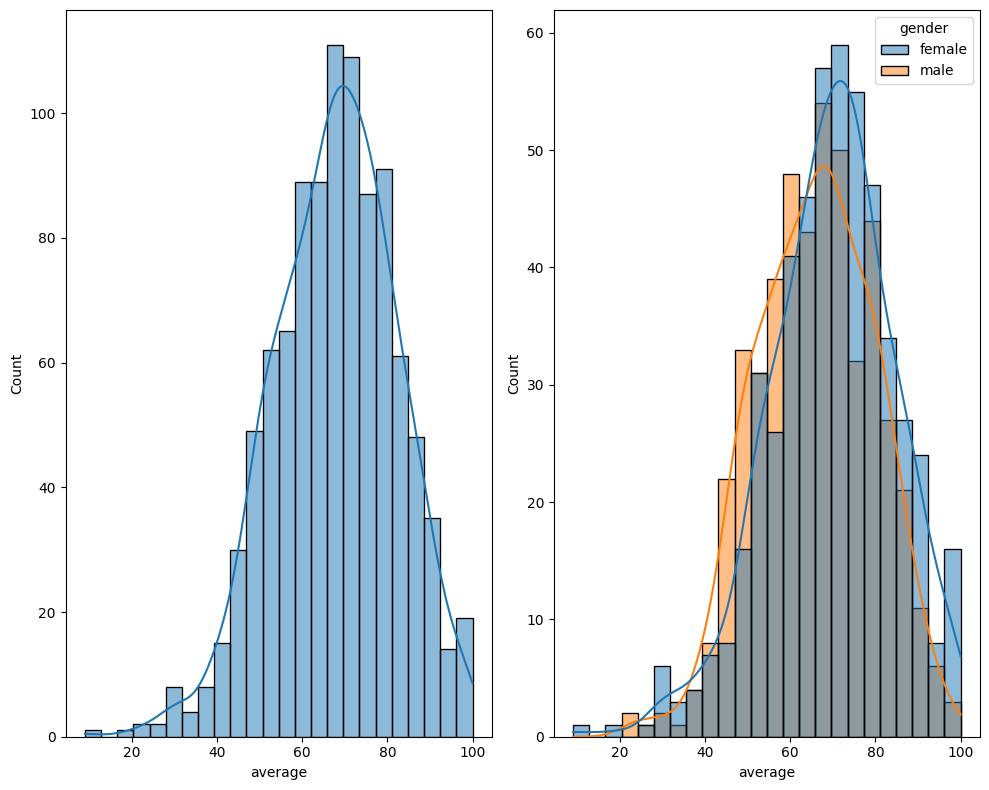

In [63]:
# plot a histplot on average with and without gender
plt.subplots(1,2,figsize=(10,8))
plt.subplot(121)
sns.histplot(x='average',data=df,kde=True)

plt.subplot(122)
sns.histplot(x='average',data=df,kde=True,hue='gender')

plt.tight_layout()
plt.show()

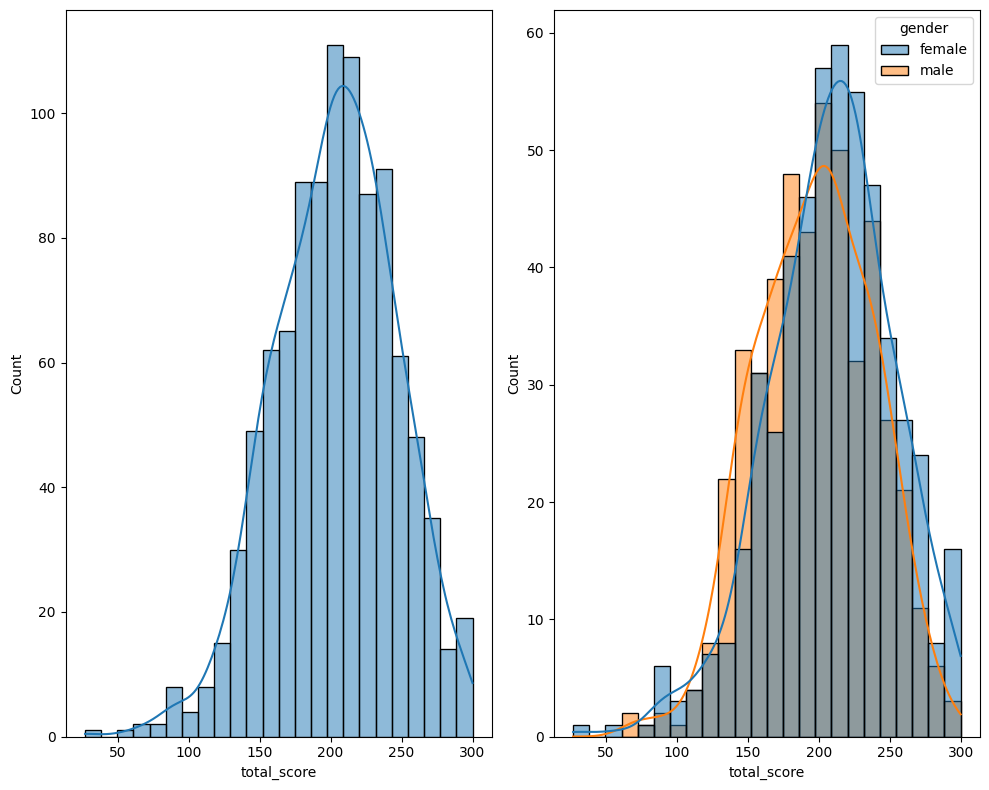

In [64]:
# plot a histplot on total_score with and without gender
plt.subplots(1,2,figsize=(10,8))
plt.subplot(121)
sns.histplot(x='total_score',data=df,kde=True)

plt.subplot(122)
sns.histplot(x='total_score',data=df,kde=True,hue='gender')

plt.tight_layout()
plt.show()

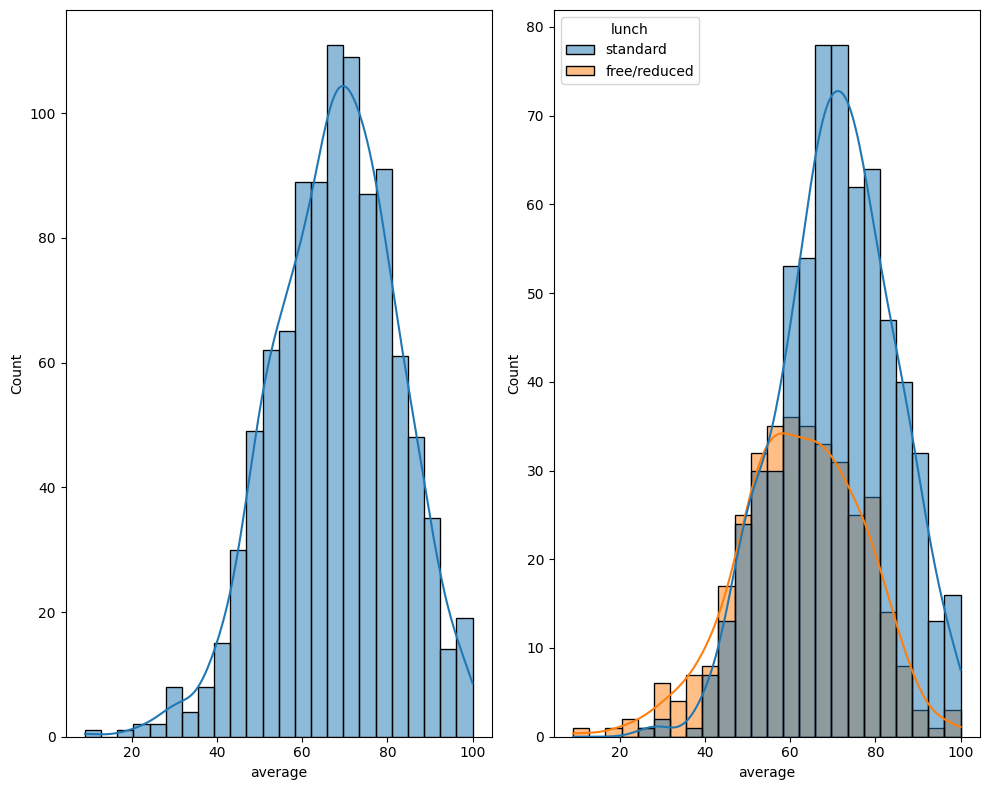

In [65]:
# plot a histplot on average with and without lunch
plt.subplots(1,2,figsize=(10,8))
plt.subplot(121)
sns.histplot(x='average',data=df,kde=True)

plt.subplot(122)
sns.histplot(x='average',data=df,kde=True,hue='lunch')

plt.tight_layout()
plt.show()

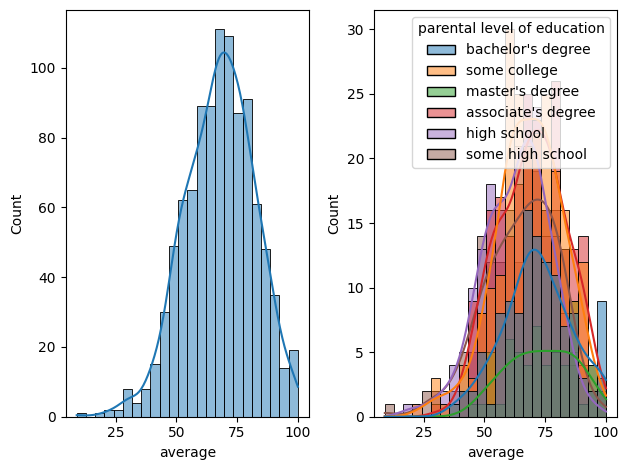

In [66]:
# plot a histplot on average with and without parental level of education
plt.subplot(121)
sns.histplot(x='average',data=df,kde=True)

plt.subplot(122)
sns.histplot(x='average',data=df,kde=True,hue='parental level of education')

plt.tight_layout()
plt.show()

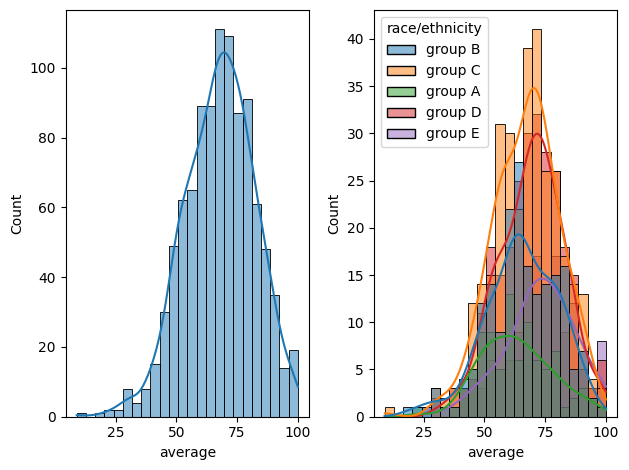

In [67]:
# plot a histplot on average with and without race/ethnicity
plt.subplot(121)
sns.histplot(x='average',data=df,kde=True)

plt.subplot(122)
sns.histplot(x='average',data=df,kde=True,hue='race/ethnicity')

plt.tight_layout()
plt.show()

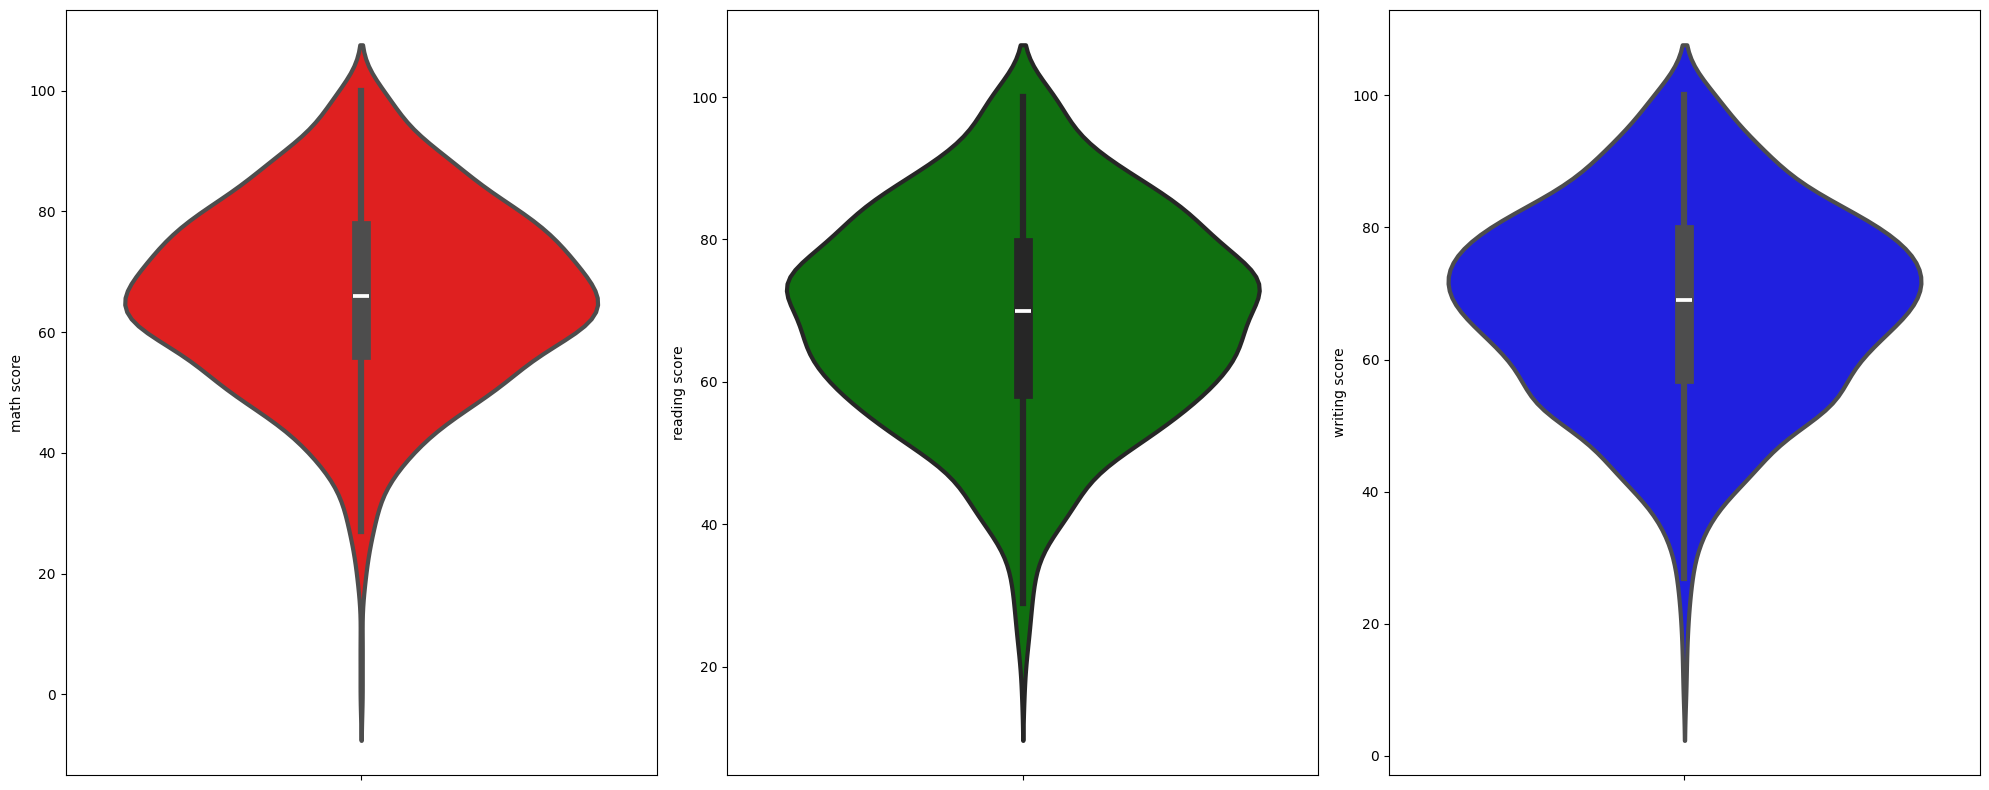

In [68]:
# plot a violinplot on math,reading,writing score

fig,axes =plt.subplots(1,3,figsize=(20,8))
#plt.subplot(1,1)
sns.violinplot(y='math score',data=df,color='red',linewidth=3,ax=axes[0])

#plt.subplot(2,1)
sns.violinplot(y='reading score',data=df,color='green',linewidth=3,ax=axes[1])

#plt.subplot(3,1)
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3,ax=axes[2])

plt.tight_layout()
plt.show()

*** multivariate analysis***

In [77]:
df['gender'].value_counts()


gender
female    518
male      482
Name: count, dtype: int64

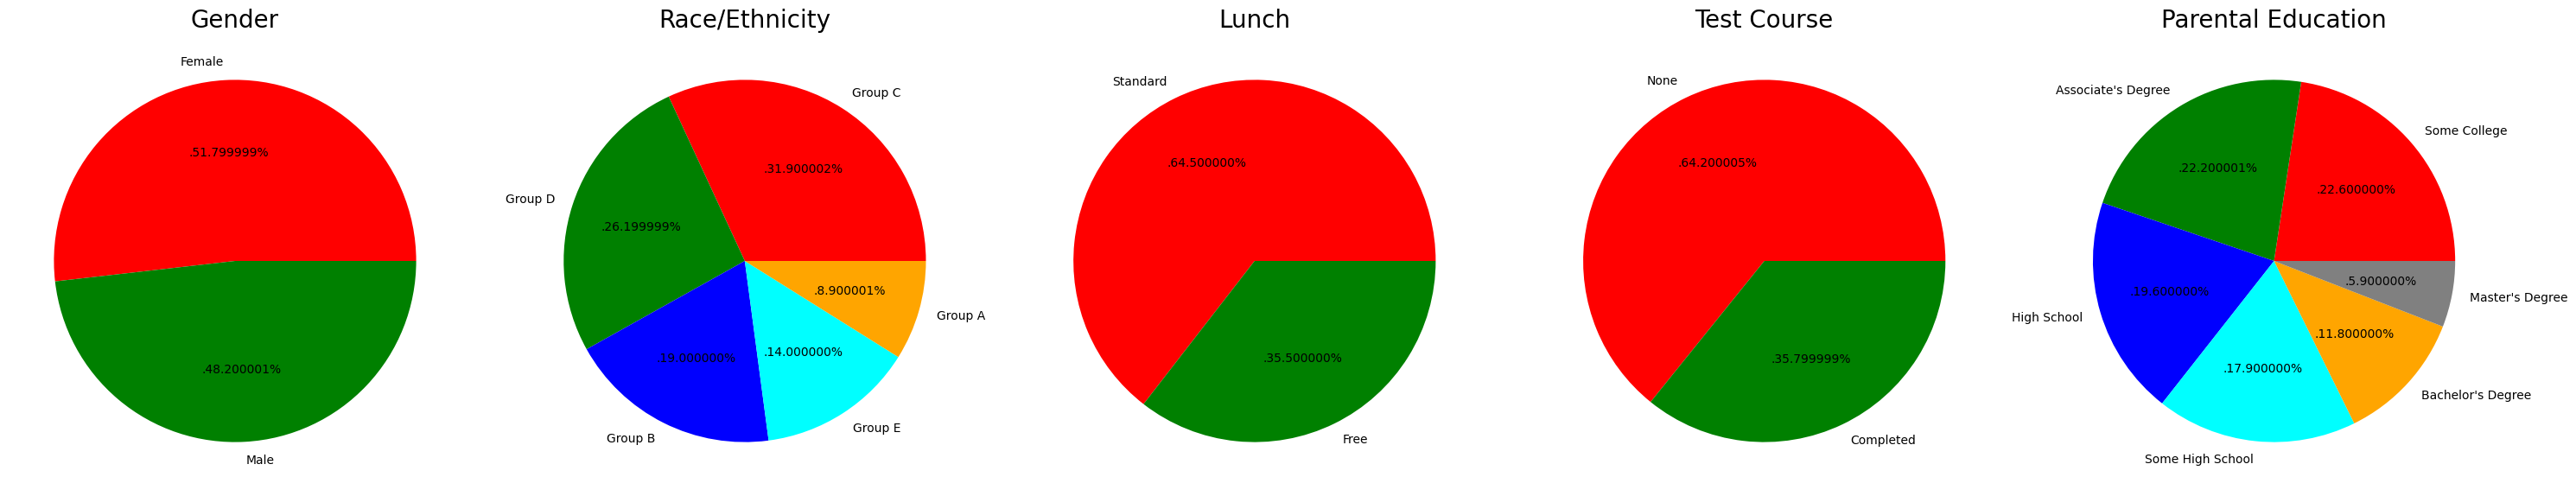

In [102]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()


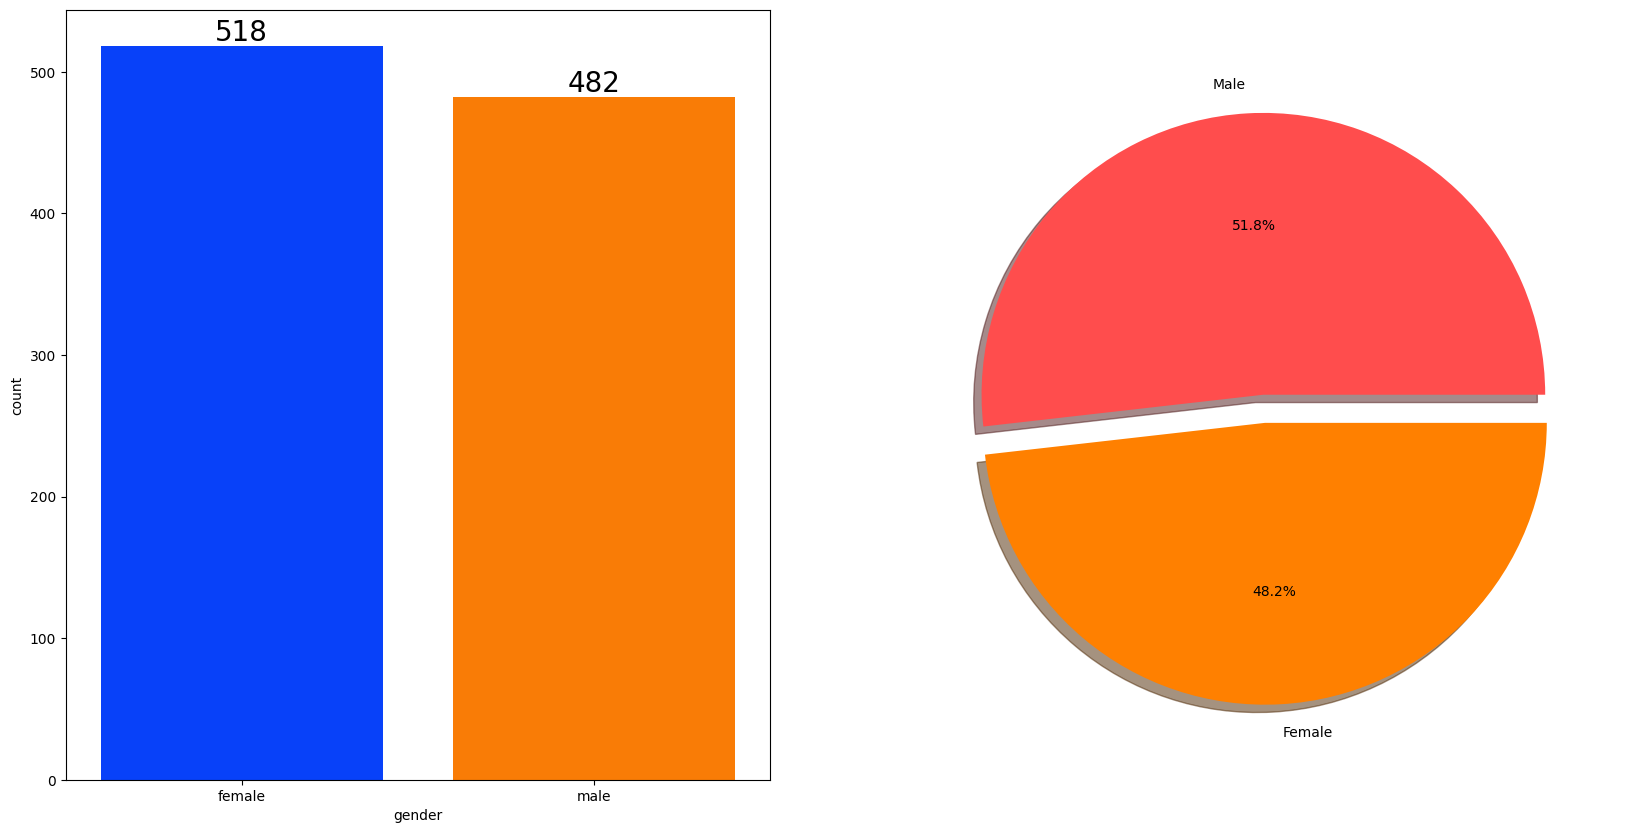

In [109]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()